## Depression Detection Using Machine Learning

In recent,  a survey conducted by Professor Uchiumi and her team, University of Tokushima. They collected  8610 participants data with various features. From those features, we are going to detect whether the person has depression or not on test data.

Tasks here done:
1. Descriptive Analysis
2. Data Visualization
3. Using Machine Learning Algorithm
             * XGBOOST
             * Logistic Regression
             * Random Forest
4. Each one's accuracy and log loss

## Implementation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alc-datathon-2021/covid_mental_health_train.csv
/kaggle/input/alc-datathon-2021/covid_mental_health_test.csv
/kaggle/input/alc-datathon-2021/Key.xlsx
/kaggle/input/alc-datathon-2021/covid_mental_health_sample_submission.csv


## Importing Necessary Libaries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stat
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from xgboost import XGBClassifier

## Data Read

In [3]:
df_train = pd.read_csv('/kaggle/input/alc-datathon-2021/covid_mental_health_train.csv')
df=df_train

#Missing Value Check for train data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
print(missing_data.head())

df_drop = df_train.dropna()

              Total    Percent
income_group   1328  15.423926
depression        0   0.000000
exercise          0   0.000000
city              0   0.000000
gender            0   0.000000


# Descriptive Analysis

## Spearman Rank Correaltion identification 

Spearman's Rank Correlation Coefficient is used to discover the strength of a link between two sets of data. Here , we are going to check between multiple features and depression 

['id', 'city', 'gender', 'age', 'job', 'health_worker_self', 'health_worker_family', 'family_status', 'income_group', 'current_physical', 'past_physical', 'current_mental', 'past_mental', 'exercise', 'healthy_diet', 'healthy_sleep', 'activity', 'interaction_offline', 'interaction_online', 'preventive_behaviors', 'optimism', 'deterioration_economy', 'deterioration_interact', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living', 'difficulty_work']
Spearman correlation: 0.022 pvalu 0.03751752794 id
Spearman correlation: 0.015 pvalu 0.15646045829 city
Spearman correlation: 0.042 pvalu 0.00010907887 gender
Spearman correlation: -0.135 pvalu 0.00000000000 age
Spearman correlation: -0.011 pvalu 0.31035703205 job
Spearman correlation: -0.017 pvalu 0.11665885329 health_worker_self
Spearman correlation: -0.012 pvalu 0.25791019318 health_worker_family
Spearman correlation: -0.116 pvalu 0.00000000000 family_status
Spearman correlation: nan pvalu nan income_group
Spearman correlat

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2., 1., 4., 2., 8., 3., 0., 3., 1., 3.]),
 array([-2.40952960e-01, -1.92723839e-01, -1.44494718e-01, -9.62655967e-02,
        -4.80364756e-02,  1.92645467e-04,  4.84217665e-02,  9.66508876e-02,
         1.44880009e-01,  1.93109130e-01,  2.41338251e-01]),
 <a list of 10 Patch objects>)

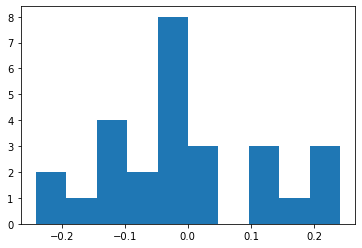

In [4]:

from scipy.stats import spearmanr
in_vars=list(df.keys())
in_vars.pop(len(in_vars)-1) # Popoe out 'depression' column
print(in_vars)
pv=[]
co1=[]
for var in in_vars:
  corr, p = spearmanr(df[var], df['depression']) # spearman correlation identification between features and depression
  #pv.append(p)
  co1.append(corr)

  print('Spearman correlation: %.3f' % corr,'pvalu %.11f' % p, var) 
  #if corr<.05:
    #print(var)
plt.hist(co1)

## Independent T test

> The Independent Samples t Test compares the means of two independent groups to find out the differences.

In [5]:
# Independent t-test

from scipy.stats import ttest_ind
in_vars=list(df.keys())
in_vars.pop(len(in_vars)-1) # Pop out 'depression' column
print(in_vars)
for var in in_vars:
  st,pvalue= ttest_ind(df[var], df['depression']) # Independent t-test
  print('statistic=',st, var)

['id', 'city', 'gender', 'age', 'job', 'health_worker_self', 'health_worker_family', 'family_status', 'income_group', 'current_physical', 'past_physical', 'current_mental', 'past_mental', 'exercise', 'healthy_diet', 'healthy_sleep', 'activity', 'interaction_offline', 'interaction_online', 'preventive_behaviors', 'optimism', 'deterioration_economy', 'deterioration_interact', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living', 'difficulty_work']
statistic= 160.8406452890185 id
statistic= 147.1888801903476 city
statistic= 198.04499303133295 gender
statistic= 289.14320227376777 age
statistic= 115.24675264303343 job
statistic= 360.9046424098348 health_worker_self
statistic= 335.93545815511806 health_worker_family
statistic= 215.59549617157273 family_status
statistic= nan income_group
statistic= 378.33420870063986 current_physical
statistic= 345.8989921418833 past_physical
statistic= 364.01894885665723 current_mental
statistic= 312.8214909254654 past_mental
statistic= 194

## Data Visualization 

Text(0.5, 1.0, 'Depression in Demographic of Japan')

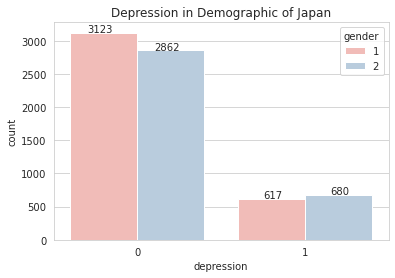

In [6]:
#Calculating Depression among the demographic

depressed = df_drop[df_drop['depression'] == 1]
non_depressed = df_drop[df_drop['depression'] == 0]

sns.set_style('whitegrid')
ax = sns.countplot(x= 'depression', data=df_drop, hue = 'gender', palette='Pastel1')
ax.axes.text(-0.3,int(non_depressed[non_depressed['gender']==1]['id'].count())+4,str(int(non_depressed[non_depressed['gender']==1]['id'].count())))
ax.axes.text(0.1,int(non_depressed[non_depressed['gender']==2]['id'].count())+4,str(int(non_depressed[non_depressed['gender']==2]['id'].count())))

ax.axes.text(0.75,int(depressed[depressed['gender']==1]['id'].count())+4,str(int(depressed[depressed['gender']==1]['id'].count())))
ax.axes.text(1.15,int(depressed[depressed['gender']==2]['id'].count())+4,str(int(depressed[depressed['gender']==2]['id'].count())))
ax.set_title("Depression in Demographic of Japan")

## Corelation Matrix

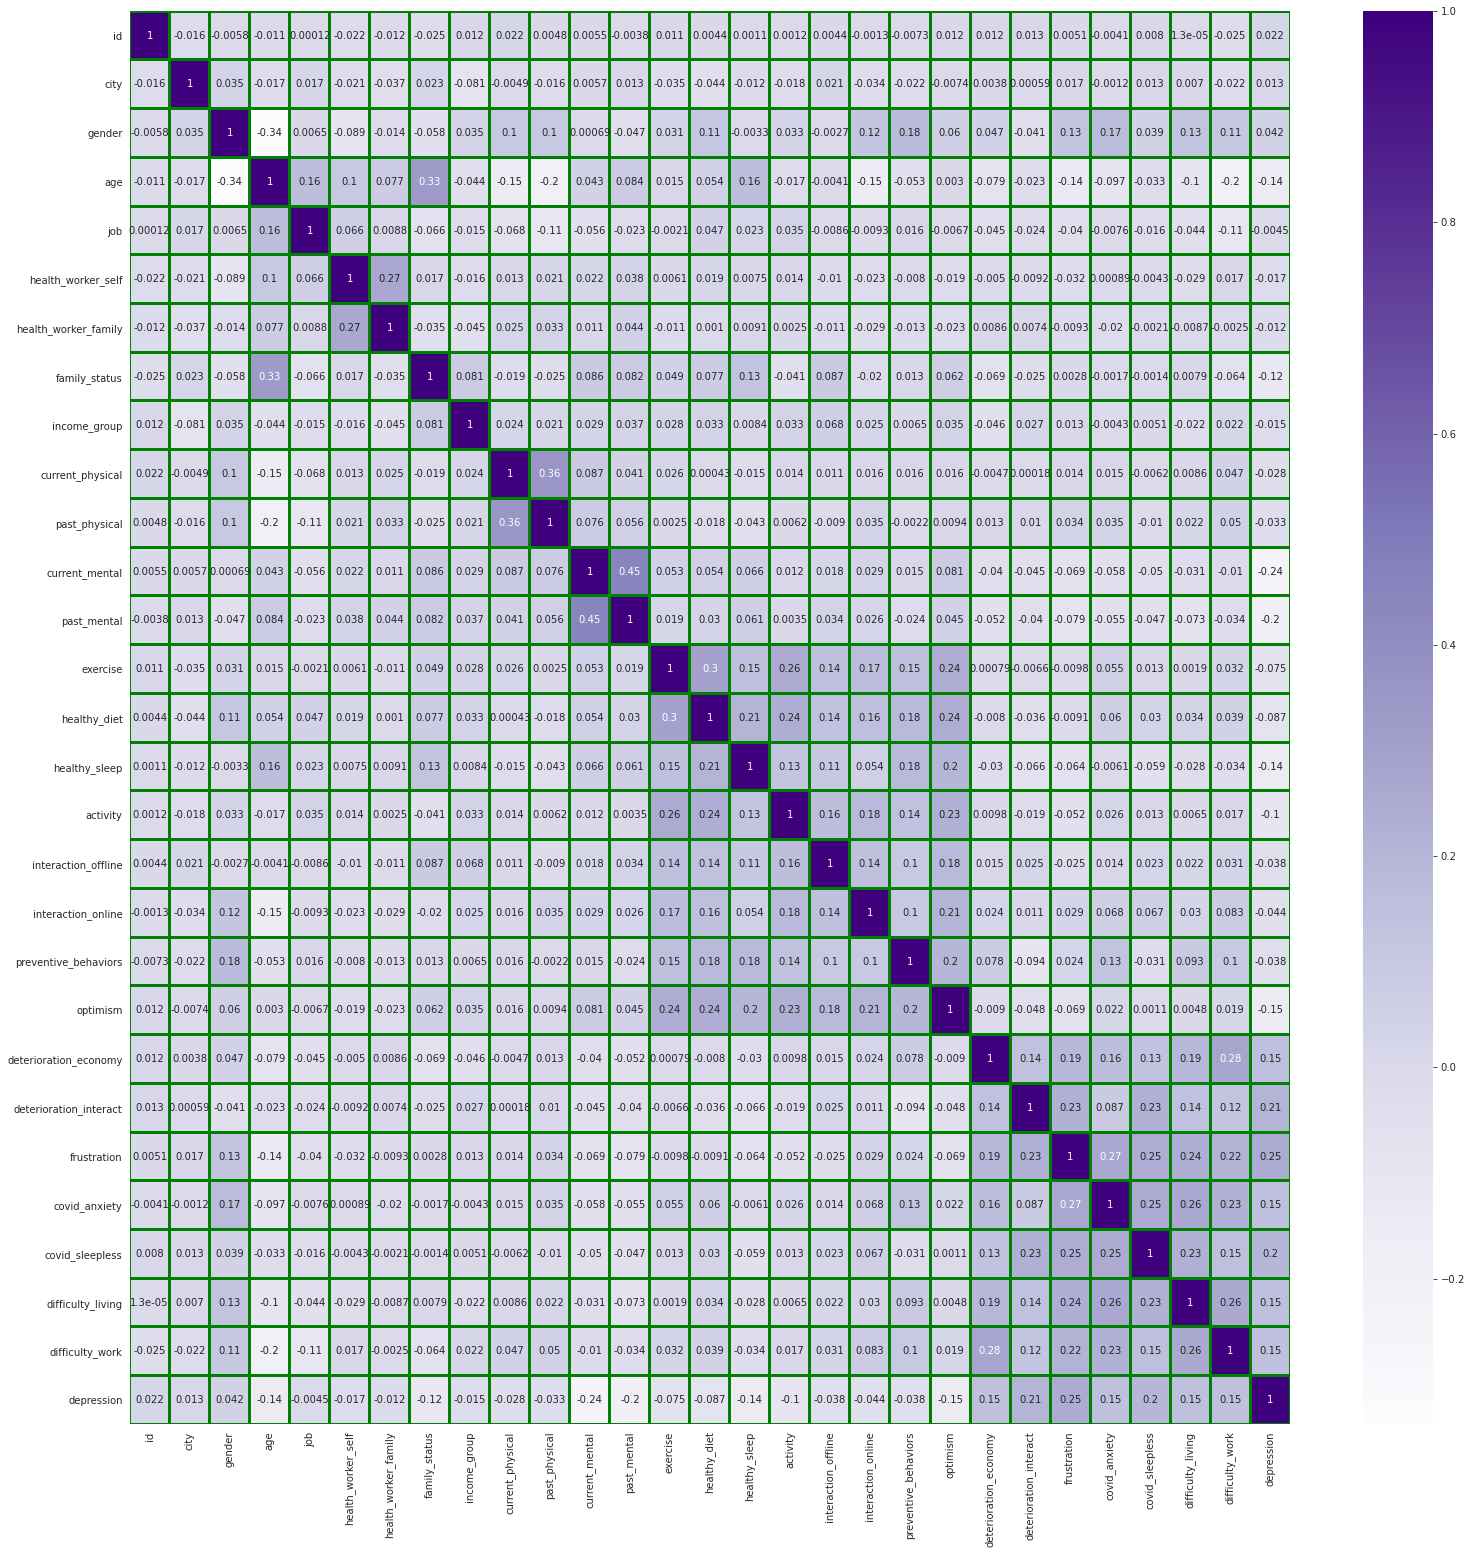

In [7]:
plt.figure(figsize = (26,26)) 
sns.heatmap(df.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=2.0) #using heatmap
plt.show()

In [8]:
healthy = df[(df['depression'] ==0) ].count()[1]
depressed = df[(df['depression'] ==1) ].count()[1]
print ("num of pepole without depression: "+ str(healthy))
print ("num of pepole with chance for depression: "+ str(depressed))

num of pepole without depression: 7056
num of pepole with chance for depression: 1554


## Different type of feature relation plotting

## Chi-Squared Test
> Finding the relation strength between two catagorical value

In [9]:
## Relationship between 2 categorical variables: chi-squared test
from scipy import stats
def chi_sq_test(DF, var1, var2):
    dataset_table = pd.crosstab(DF[var1], DF[var2])
    print('contingency table between {} and {} is:\n'.format(var1, var2))
    print(dataset_table)
    val = stats.chi2_contingency(dataset_table)
    Observed_Values = dataset_table.values 
    Expected_Values = val[-1]
    no_of_rows = dataset_table.shape[0]
    no_of_columns = dataset_table.shape[1]
    ddof = (no_of_rows-1)*(no_of_columns-1)
    print("\nDegree of Freedom:-",ddof)
    alpha = 0.05
    chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values, Expected_Values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    critical_value = stats.chi2.ppf(q=1-alpha,df=ddof)
    p_value = 1-stats.chi2.cdf(x=chi_square_statistic,df=ddof)
    
    if chi_square_statistic>=critical_value and p_value<=alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a relationship between 2 categorical variables".format(chi_square_statistic, p_value))
    elif chi_square_statistic>=critical_value and p_value>alpha:
        print("chi_square_statistic is {} and p-value is {}. So, there is a weak relationship between 2 categorical variables, but not evident enough".format(chi_square_statistic, p_value))
    else:
        print("chi_square_statistic is {} and p-value is {}. So, these 2 variables are not related at all.".format(chi_square_statistic, p_value))
chi_sq_test(df, 'gender', 'depression')

contingency table between gender and depression is:

depression     0    1
gender               
1           3415  668
2           3641  886

Degree of Freedom:- 1
chi_square_statistic is 14.96401255926579 and p-value is 0.00010958122957660521. So, there is a relationship between 2 categorical variables


Text(6.0, 76, '75')

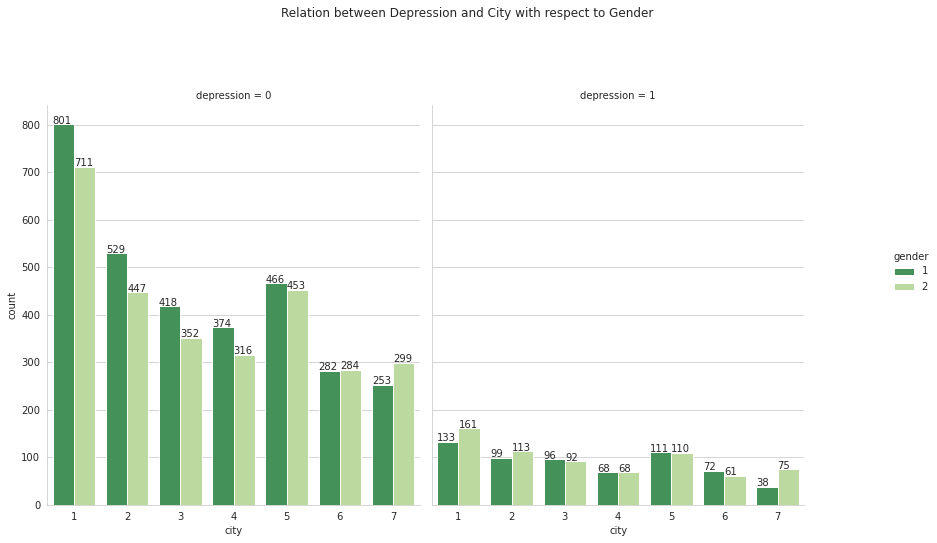

In [10]:
#Depression analysis with respect to gender

sns.set_style("whitegrid")
g = sns.catplot(x="city", hue = 'gender', col = 'depression', data= df_drop, kind = 'count', palette="YlGn_r", col_wrap = 2)
g.fig.set_size_inches(13,8)
g.fig.subplots_adjust(top=0.81,right=0.86)
g.fig.suptitle('Relation between Depression and City with respect to Gender')

#No Depression
g.axes[0].text(-0.4,801+1,'801')
g.axes[0].text(0.0,711+1,'711')

g.axes[0].text(0.60,529+1,'529')
g.axes[0].text(1.0,447+1,'447')

g.axes[0].text(1.6,418+1,'418')
g.axes[0].text(2.0,352+1,'352')

g.axes[0].text(2.6,374+1,'374')
g.axes[0].text(3.0,316+1,'316')

g.axes[0].text(3.6,466+1,'466')
g.axes[0].text(4.0,453+1,'453')

g.axes[0].text(4.6,282+1,'282')
g.axes[0].text(5.0,284+1,'284')

g.axes[0].text(5.6,253+1,'253')
g.axes[0].text(6.0,299+1,'299')

#Depression
g.axes[1].text(-0.4,133+1,'133')
g.axes[1].text(0.0,161+1,'161')

g.axes[1].text(0.60,99+2,'99')
g.axes[1].text(1.0,113+1,'113')

g.axes[1].text(1.6,96+1,'96')
g.axes[1].text(2.0,92+1,'92')

g.axes[1].text(2.6,68+1,'68')
g.axes[1].text(3.0,68+1,'68')

g.axes[1].text(3.6,111+1,'111')
g.axes[1].text(4.0,110+1,'110')

g.axes[1].text(4.6,72+1,'72')
g.axes[1].text(5.0,61+1,'61')

g.axes[1].text(5.6,38+1,'38')
g.axes[1].text(6.0,75+1,'75')

In [11]:
chi_sq_test(df, 'age', 'depression')

contingency table between age and depression is:

depression   0   1
age               
18          27   6
19          60  22
20          76  31
21          56  27
22          80  33
..          ..  ..
84           4   0
85           4   0
86           4   0
87           1   0
89           2   0

[71 rows x 2 columns]

Degree of Freedom:- 70
chi_square_statistic is 248.27519453168867 and p-value is 0.0. So, there is a relationship between 2 categorical variables


In [12]:
#Age Group By Depression
df_age = df_drop[['age', 'depression']]

df_age_30 = df_age[df_age['age'].between(11, 30)]
df_age_50 = df_age[df_age['age'].between(31, 50)]
df_age_80 = df_age[df_age['age'].between(51, 80)]
df_age_100 = df_age[df_age['age'].between(81, 100)]

depression_by_age = {'11-30':[len(df_age_30[df_age_30['depression'] == 1]), len(df_age_30[df_age_30['depression'] == 0])],
                     '31-50':[len(df_age_50[df_age_50['depression'] == 1]), len(df_age_50[df_age_50['depression'] == 0])], 
                     '50-80':[len(df_age_80[df_age_80['depression'] == 1]), len(df_age_80[df_age_80['depression'] == 0])], 
                     '80-100':[len(df_age_100[df_age_100['depression'] == 1]), len(df_age_100[df_age_100['depression'] == 0])]}
depressed_age = [depression_by_age['11-30'][0], depression_by_age['31-50'][0], depression_by_age['50-80'][0], depression_by_age['80-100'][0]]
non_depressed_age = [depression_by_age['11-30'][1], depression_by_age['31-50'][1], depression_by_age['50-80'][1], depression_by_age['80-100'][1]]

df_age_depression = pd.DataFrame({'age_group':list(depression_by_age.keys()), 'depressed': depressed_age, 'non_depressed': non_depressed_age})
print(df_age_depression)

  age_group  depressed  non_depressed
0     11-30        280            887
1     31-50        638           2415
2     50-80        379           2654
3    80-100          0             29


Text(0.5, 1.0, 'Depression vs Optimism')

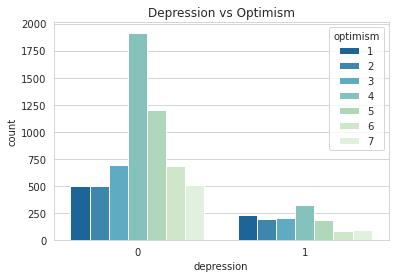

In [13]:
ax = sns.countplot(x='depression',hue='optimism',data=df_drop,palette='GnBu_r')
ax.set_title("Depression vs Optimism")

In [14]:
chi_sq_test(df, 'healthy_sleep', 'depression')

contingency table between healthy_sleep and depression is:

depression        0    1
healthy_sleep           
1               582  239
2               554  174
3               717  184
4              1138  320
5              1403  285
6              1363  190
7              1299  162

Degree of Freedom:- 6
chi_square_statistic is 188.09460535989444 and p-value is 0.0. So, there is a relationship between 2 categorical variables


Text(0.5, 1.0, 'Depression vs Healthy Sleep')

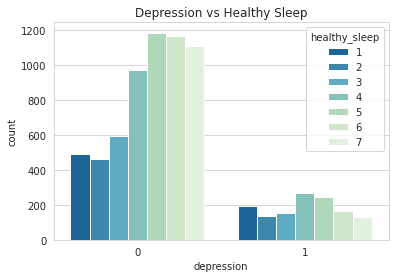

In [15]:
ax = sns.countplot(x='depression',hue='healthy_sleep',data=df_drop,palette='GnBu_r')
ax.set_title("Depression vs Healthy Sleep")

# Mean vs Median Plot

id  mean= 1072829390.7138212  median= 1079098015.0 
 mode= ModeResult(mode=array([365236]), count=array([1]))
city  mean= 3.424274099883856  median= 3.0 
 mode= ModeResult(mode=array([1]), count=array([2110]))
gender  mean= 1.5257839721254356  median= 2.0 
 mode= ModeResult(mode=array([2]), count=array([4527]))
age  mean= 46.088269454123115  median= 46.0 
 mode= ModeResult(mode=array([46]), count=array([253]))
job  mean= 1.6498257839721255  median= 1.0 
 mode= ModeResult(mode=array([1]), count=array([5794]))
health_worker_self  mean= 1.9397212543554008  median= 2.0 
 mode= ModeResult(mode=array([2]), count=array([8091]))
health_worker_family  mean= 1.9114982578397213  median= 2.0 
 mode= ModeResult(mode=array([2]), count=array([7848]))
family_status  mean= 1.6196283391405342  median= 2.0 
 mode= ModeResult(mode=array([2]), count=array([5335]))
income_group  mean= 4.308981049162318  median= nan 
 mode= ModeResult(mode=array([3.]), count=array([1684]))
current_physical  mean= 1.956329849

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.median is deprecated and will be removed in SciPy 2.0.0, use numpy.median instead
  


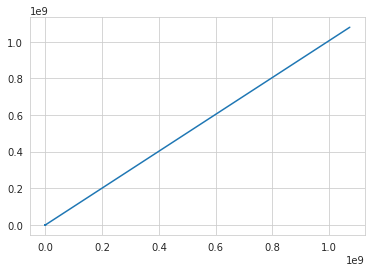

In [16]:
import scipy as sp
df=df_train
in_vars=list(df.keys())
mean_list=[]
median_list=[]
for var in in_vars:
  mean=sp.mean(df[var]) # mean determination
  median=sp.median(df[var]) # median determination
  mode=sp.stats.mode(df[var]) #mode determination
  print(var,' mean=', mean,' median=',median, '\n mode=', mode)
  mean_list.append(mean)
  median_list.append(median)
plt.plot(mean_list,median_list) #plotting mean vs median

# Predictive Analysis

## Feature Extraction

In [17]:
label = df_drop['depression']
#print(label)
feature_list = list(df_drop.columns)
feature_list.remove('id')
feature_list.remove('depression')
data = df_drop[feature_list]
#print(data)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5097, 27) (5097,)
(2185, 27) (2185,)


                  Features       Score
0                     city    0.349600
1                   gender    1.103652
2                      age  504.635019
3                      job    0.009049
4       health_worker_self    0.149769
5     health_worker_family    0.001040
6            family_status   14.950461
7             income_group    0.069117
8         current_physical    0.178154
9            past_physical    0.176793
10          current_mental    7.739366
11             past_mental    9.971598
12                exercise   29.663463
13            healthy_diet   28.004028
14           healthy_sleep   69.923771
15                activity   41.432689
16     interaction_offline    7.531608
17      interaction_online   16.746445
18    preventive_behaviors    6.130579
19                optimism   61.565755
20   deterioration_economy  117.078341
21  deterioration_interact  239.628698
22             frustration  329.532439
23           covid_anxiety   76.570771
24         covid_sleeples

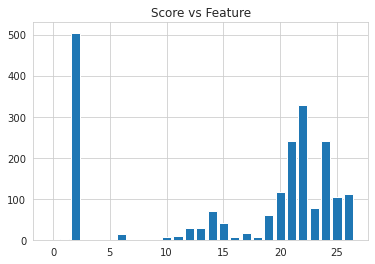

In [18]:
#Calculating Feature Importance by Chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)

features_weights_list = {f'Feature {i+1}': fs.scores_[i] for i in range(len(fs.scores_))}
feature_score = pd.DataFrame({'Features': feature_list, 'Score': list(features_weights_list.values())})
print(feature_score)
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Score vs Feature")
plt.show()

## Random Forest Algorithm
Random Forest is a algorithm which generates multiple decision trees and then predicts the result of majority.

In [19]:

# Splitting the dataset into training and test set.  
forest = RandomForestClassifierforest = RandomForestClassifier(n_estimators= 600, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 60, bootstrap = False)
forest.fit(X_train,y_train)
y_pred = forest.predict_proba(X_test)[:, 1]
#accuracy using roc
print("Without feature Selection")
print("AUC Score: %.3f" % roc_auc_score(y_test, y_pred))

Without feature Selection
AUC Score: 0.812


## XGBoost without feature selection


In [20]:
#XGBoost

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train,y_train)
y_pred = xgb.predict_proba(X_test)[:,1]
print("AUC:")
print(roc_auc_score(y_test, y_pred))

AUC:
0.7825183094293562


## XGBoost with feature selection on train data

In [21]:
df1=pd.read_csv('/kaggle/input/alc-datathon-2021/covid_mental_health_test.csv')

X = df[['gender', 'age', 'job', 'health_worker_self','health_worker_family',  'income_group','past_physical','current_physical',  'current_mental', 'past_mental',
      'exercise', 'healthy_diet', 'healthy_sleep', 'activity','interaction_offline', 'interaction_online', 'preventive_behaviors','optimism', 'deterioration_economy', 'deterioration_interact','frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living',
    'difficulty_work']]
#X=df[['difficulty_work','covid_sleepless','frustration','optimism','interaction_online','healthy_sleep','health_worker_self', 'current_physical', 'current_mental']]
y = df['depression']


#X=df[['deterioration_economy','deterioration_interact','frustration','covid_anxiety','covid_sleepless','difficulty_living','difficulty_work']]

In [22]:

Id=df1['id']

test_X = df1[[ 'gender', 'age', 'job', 'health_worker_self','health_worker_family', 'income_group','past_physical',
   'current_physical', 'current_mental', 'past_mental','exercise', 'healthy_diet', 'healthy_sleep', 'activity',
'interaction_offline', 'interaction_online', 'preventive_behaviors','optimism', 'deterioration_economy', 'deterioration_interact',
'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living','difficulty_work']]
#test_X=df1[['difficulty_work','covid_sleepless','frustration','optimism','interaction_online','healthy_sleep','health_worker_self', 'current_physical', 'current_mental']]
#test_X=df1[['deterioration_economy','deterioration_interact','frustration','covid_anxiety','covid_sleepless','difficulty_living','difficulty_work']]

In [23]:
import xgboost as xg
import xgboost as xgb
# Instantiation using regression
# 
xgb_r = xg.XGBClassifier(objective="binary:logistic", random_state=42,eval_metric="auc")
# Fitting the model 
xgb_r.fit(X, y) 
  
# Predict the model 
pred = xgb_r.predict_proba(test_X)

In [24]:
pred

array([[0.9392437 , 0.06075631],
       [0.9731304 , 0.02686959],
       [0.7289029 , 0.27109712],
       ...,
       [0.90507406, 0.09492596],
       [0.691153  , 0.308847  ],
       [0.92656934, 0.07343065]], dtype=float32)

In [25]:
print("Accuracy of train dataset:",xgb_r.score(X,y))

Accuracy of train dataset: 0.9821138211382113


In [26]:
result1=pd.DataFrame({'id':df1['id'],'depression score':pred[:,1]})
result1

,id,depression score
0,828763412,0.060756
1,2009293273,0.026870
2,360753013,0.271097
3,321912830,0.024795
4,1090960107,0.371614
...,...,...
2718,1757603200,0.128106
2719,262849879,0.476907
2720,1521871763,0.094926
2721,2053555030,0.308847


## Performance Metrics

In [27]:
from sklearn import model_selection

#using logloss model
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
scoring = 'accuracy'
logloss_score = model_selection.cross_val_score(xgb_r, X, y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (logloss_score.mean(), logloss_score.std()))

Logloss: 0.827 (0.009)


In [28]:
test_df = df1
raw_train_df = df
# using isnull() function   
raw_train_df.isnull().any()
# drop all rows with any NaN and NaT values
#raw_train_df = raw_train_df.dropna()

#fill null values with the mean of the corresponding column
raw_train_df = raw_train_df.fillna(raw_train_df.mean())
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8610 entries, 0 to 8609
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      8610 non-null   int64  
 1   city                    8610 non-null   int64  
 2   gender                  8610 non-null   int64  
 3   age                     8610 non-null   int64  
 4   job                     8610 non-null   int64  
 5   health_worker_self      8610 non-null   int64  
 6   health_worker_family    8610 non-null   int64  
 7   family_status           8610 non-null   int64  
 8   income_group            8610 non-null   float64
 9   current_physical        8610 non-null   int64  
 10  past_physical           8610 non-null   int64  
 11  current_mental          8610 non-null   int64  
 12  past_mental             8610 non-null   int64  
 13  exercise                8610 non-null   int64  
 14  healthy_diet            8610 non-null   

In [29]:
array = raw_train_df.values
X = array[:,1:28]

y = array[:,28]

In [30]:
#After Discarding the features with low importance score
discard_feature = ['health_worker_family', 'job', 'income_group']
feature_list_updated =['city', 'gender', 'age', 'health_worker_self', 'family_status', 'current_physical', 'past_physical', 'current_mental', 'past_mental', 'exercise', 'healthy_diet', 'healthy_sleep', 'activity', 'interaction_offline', 'interaction_online', 'preventive_behaviors', 'optimism', 'deterioration_economy', 'deterioration_interact', 'frustration', 'covid_anxiety', 'covid_sleepless', 'difficulty_living', 'difficulty_work']
data = df_drop[feature_list_updated]

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(data, label, test_size=0.3, random_state=42)
print(X_train_fs.shape, y_train_fs.shape)
print(X_test_fs.shape, y_test_fs.shape)

(5097, 24) (5097,)
(2185, 24) (2185,)


## Logistic Regression

In [31]:
#Logistic Regression

log_model = LogisticRegression(max_iter=450)

log_model.fit(X_train,y_train)
y_pred=log_model.predict_proba(X_test)[:,1]
print("Without feature Selection")
print("AUC: %.6f" % roc_auc_score(y_test, y_pred))


 #log_model.fit(X_train_fs,y_train_fs)
#y_pred=log_model.predict_proba(X_test_fs)[:,1]
 #print("With feature Selection")
#print("AUC: %.6f" % roc_auc_score(y_test_fs, y_pred))

Without feature Selection
AUC: 0.819152


In [32]:
df_test = pd.read_csv("/kaggle/input/alc-datathon-2021/covid_mental_health_test.csv")
df_test = df_test.fillna(0)
df_test_id = df_test['id']

print("Without Feature Selection")
x_test = df_test[feature_list]
y_test_pred = log_model.predict_proba(x_test)[:,1]
print(y_test_pred)

# print("With Feature Selection")
# x_test_fs = df_test[feature_list_updated]
# y_test_pred_fs = log_model.predict_proba(x_test_fs)[:,1]
# print(y_test_pred_fs)

Without Feature Selection
[0.08601588 0.05239011 0.07526029 ... 0.12417522 0.06759909 0.22225225]


## Conclusion
So, in this dataset XGBoost performed better in depression detection.